# Bayesian Multilateration Example
Example of using Bayesian Multilateration on an artificial dataset

In [1]:
import ds_utils
import multilateration as mlat
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Setup
In the cell below we have the experiment setup. The description of the parameters is briefly described in the comments. More details can be found [here](https://www.techrxiv.org/articles/preprint/Bayesian_Multilateration/16806688)

In [6]:
K = 3                   # Number of reference points
N = 50                  # Number of observed distances
radius = 40             # Distance between the target and the reference points
sigma_r = 10            # standard devistion of the reference points prior
sigma_t = 10            # standard deviation of the target prior
theta = [8, 8, 8]       # dispersion parameter of likelihood

The result of the experiment will be shown in a figure with the indication of the distances between the target and the reference points (circles with a color for each reference point), the position of the target (a star in the center of the image), the distribution of the linear method, used as prior for the Bayesian method (red curve), and the distribution of Bayesian Multilateration (blue curve)

Using cached StanModel


<AxesSubplot:>

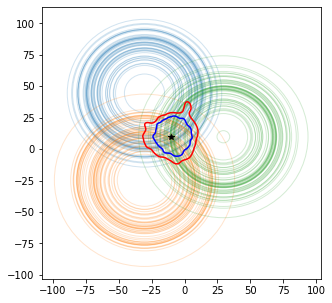

In [7]:
data = ds_utils.generate_artificial_data(K, N, radius, sigma_r, theta, sigma_t)
f, ax = plt.subplots(1, 1, figsize=[5, 5])
ds_utils.plot_data(data, ax)


Q = mlat.bootstrap_sampler('LMLAT', data)
sns.kdeplot(x=Q[:, 0], y=Q[:, 1], ax=ax, color='r', levels=1)

mu = Q.mean(axis=0)
sigma_t = np.sqrt(np.cov(Q.T).max())
Q = mlat.bmlat_sampler(data, mu, sigma_t, sigma_r, theta)
sns.kdeplot(x=Q[:, 0], y=Q[:, 1], ax=ax, color='b', levels=1)
